In [ ]:
import numpy as np
from market_changes import market as market_adj
from market import market
from market_close_volume import market_close_vol
from randomAgent import Agent
from momentumagent import MomentumAgent
from momentumagent_v2 import MomentumAgent_v2
from rsi_agent import RSIAgent
from closeVolumeAgent import VolumeMomentumAgent

In [ ]:
env_close = market(['AAPL', 'MSFT'],column_to_keep='Close')
env_open = market(['AAPL', 'MSFT'],column_to_keep='Open')
env_adj = market_adj(['AAPL', 'MSFT'])
env_close_volume = market_close_vol(['AAPL', 'MSFT'])
environments = {"Close":env_close, "Adjusted": env_adj, "Open": env_open, "Close_Volume": env_close_volume}
agent_random = Agent(len(env_close.index_actions))
agent_momentum = MomentumAgent(len(env_close.index_actions), env_close.total_companies)
agent_momentum_v2 = MomentumAgent_v2(len(env_close.index_actions), env_close.total_companies)
rsi_agent = RSIAgent(len(env_close.index_actions), env_close.total_companies)
close_vol_agent = VolumeMomentumAgent(len(env_close.index_actions), env_close.total_companies)


In [3]:
def play_episode(agent, market):
    state = market.start()
    done = False
    
    while not done:
        action = agent.act(state)
        next_state, reward, done = market.new_day(action)
        state = next_state
    
    return market.get_episode_value()

In [4]:
agents_profits = {}
for env_name, env in environments.items():
    agents_profits[f'{env_name}_random'] = play_episode(agent_random,env)
    agents_profits[f'{env_name}_momentum'] = play_episode(agent_momentum,env)
    agents_profits[f'{env_name}_momentum_v2'] = play_episode(agent_momentum_v2,env)
    agents_profits[f'{env_name}_rsi'] = play_episode(rsi_agent,env)

agents_profits[f'Close_Volume_cv'] = play_episode(close_vol_agent,env_close_volume)


In [7]:
agents_profits

{'Close_random': 1879896.6836604516,
 'Close_momentum': 528733.8683313422,
 'Close_momentum_v2': 5117251.504250268,
 'Close_rsi': 1331207.6050354505,
 'Adjusted_random': 13154.394480359613,
 'Adjusted_momentum': 12236.87492457915,
 'Adjusted_momentum_v2': 14034.560454992754,
 'Adjusted_rsi': 13819.61238057737,
 'Open_random': 329549.9843104598,
 'Open_momentum': 8128871.01525843,
 'Open_momentum_v2': 2294683.3386042146,
 'Open_rsi': 8213119.889689282,
 'Close_Volume_random': 156228.80457945113,
 'Close_Volume_momentum': 598284.3772521833,
 'Close_Volume_momentum_v2': 28282.375396243704,
 'Close_Volume_rsi': 47123.841591633165,
 'Close_Volume_cv': 41288.2789173943}

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse into DataFrame
rows = []
for key, value in agents_profits.items():
    strings = key.split("_")
    if '_v2' in key:
        agent = '_'.join(strings[-2:])
        env = '_'.join(strings[:-2])
    else:
        agent = '_'.join(strings[-1:])
        env = '_'.join(strings[:-1])
    rows.append({'Environment': env, 'Agent': agent, 'Profit': value})

df = pd.DataFrame(rows)


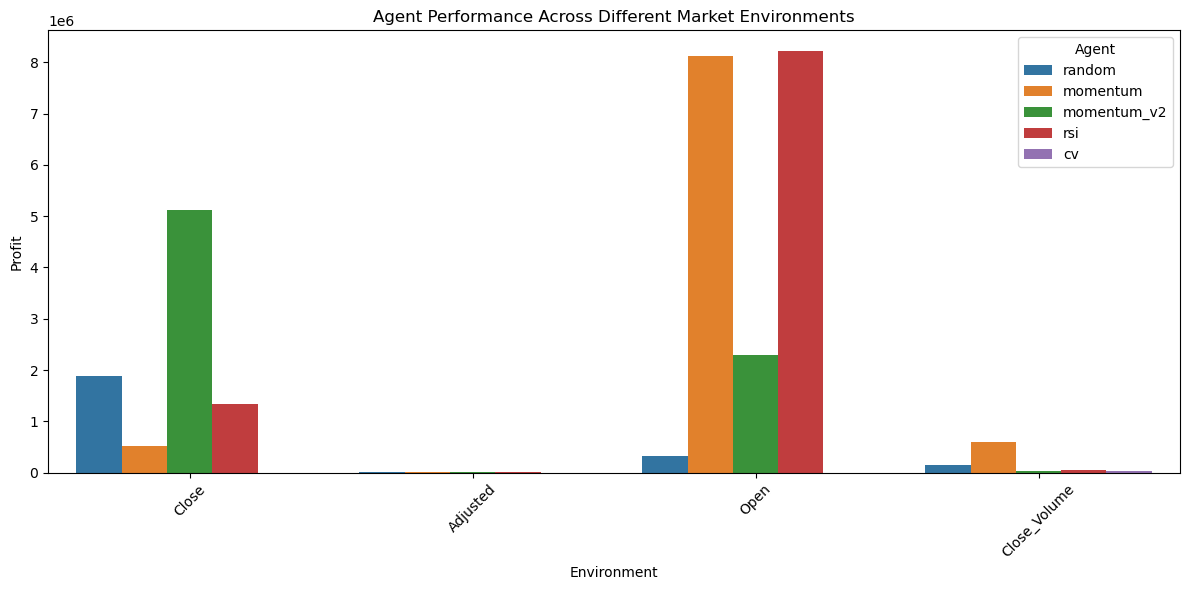

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Environment', y='Profit', hue='Agent')
plt.title('Agent Performance Across Different Market Environments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
print(f'Maximum profit with {df.loc[df.Profit.idxmax(),'Agent']}: {max(df.Profit)}')

Maximum profit with rsi: 8213119.889689282
